In [1]:
import sys
#print(sys.version)

import matplotlib.pyplot as plt
#%matplotlib inline
%config BackendInline.figure_format='eps'

plt.style.use(['seaborn-paper', 'seaborn-white', 'seaborn-ticks'])
#plt.matplotlib.rcParams['figure.dpi'] = 120
#plt.matplotlib.rcParams['savefig.dpi'] = 120

import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn import cluster

import mlgrad.func as func
import mlgrad.distance as distance
import mlgrad.weights as weights
import mlgrad.averager as averager
import mlgrad.kmeans as kmeans
import mlgrad.avragg as avragg

from mlgrad import ws_average_it, averager_it, averager_fg, fg, erm_fg, sg, erm_sg, irgd, erm_irgd, drisk

(200, 2) (100, 2)


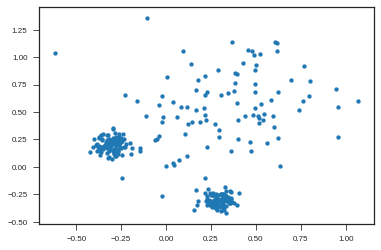

In [2]:
S=100.
X_1, Y_1 = make_blobs(n_samples=200, n_features=2, 
                    centers=[(-30,20), (30,-30)], 
                    cluster_std=[5.0, 5.0])
Y_1 += 1

X_2, Y_2 = make_blobs(n_samples=100, n_features=2, 
                    centers=[(10,40),(40, 70)], 
                    cluster_std=[30., 30.])
Y_2 = 3
print(X_1.shape, X_2.shape)
X1 = np.vstack([X_1, X_2])
Y1 = np.hstack([Y_1, Y_2])
X1 /= S

plt.scatter(X1[:,0], X1[:,1], s=16, cmap=plt.cm.rainbow)
plt.show()

(200, 2) (200, 2)


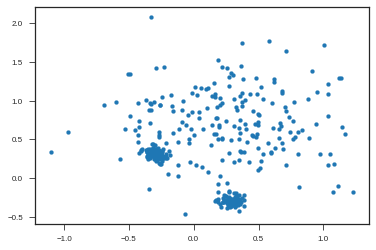

In [3]:
X_1, Y_1 = make_blobs(n_samples=200, n_features=2, 
                    centers=[(-30,30), (30,-30)], 
                    cluster_std=[5.0, 5.0])
Y_1 += 1

X_2, Y_2 = make_blobs(n_samples=200, n_features=2, 
                    centers=[(0,70),(60, 70)], 
                    cluster_std=[40., 40.])
Y_2 = 3
print(X_1.shape, X_2.shape)
X2 = np.vstack([X_1, X_2])
Y2 = np.hstack([Y_1, Y_2])
X2 /= S

plt.scatter(X2[:,0], X2[:,1], s=16, cmap=plt.cm.rainbow)
plt.show()

In [4]:
xmin, xmax = -150./S, 170./S
ymin, ymax = -50./S, 170./S
def draw_map(cls, i):
    x_range = np.linspace(xmin, xmax, 100)
    y_range = np.linspace(ymin, ymax, 100)
    XX, YY = np.meshgrid(x_range, y_range)
    XY = np.c_[XX.ravel(), YY.ravel()]
    ZZ = cls(XY)
    ZZ = ZZ[:,i]
    ZZ = ZZ.reshape(XX.shape)
    im = plt.imshow(ZZ, origin='bottom', extent=(xmin,xmax,ymin,ymax), aspect="auto")
#     plt.colorbar(im)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

In [5]:
s=30.
avrfunc = averager_it(func.QuantileFunc(0.33, func.Sqrt()))
minfunc = avragg.KolmogorovMean(func.Power(6.), func.Power(1./6.))
hcd_rob2 = kmeans.HCD_M2(avrfunc, minfunc, X1, 2, n_iter=1000, tol=0.01)
hcd_rob2.fit()

1001 [[-0.17755892  0.23819383]
 [ 0.30416882 -0.24897378]]


NameError: name 'hcd_rob3' is not defined

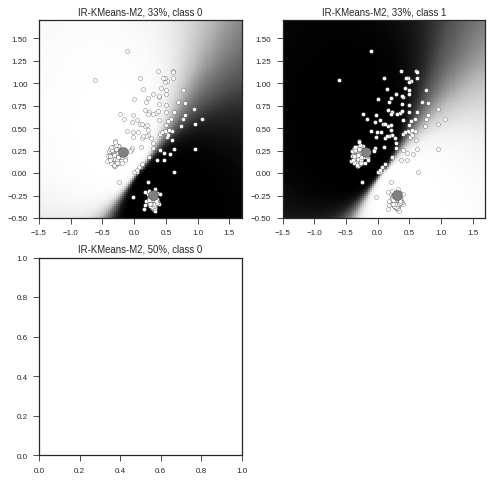

In [6]:
plt.figure(figsize=(8,8))
plt.subplot(2, 2, 1)
plt.title(r"IR-KMeans-M2, 33%, class 0")
draw_map(hcd_rob2, 0)
plt.scatter(X1[:,0], X1[:,1], s=16, c='w', edgecolors='k')
plt.scatter(hcd_rob2.params[:,0], hcd_rob2.params[:,1], c='Grey', s=100, edgecolors='k')
plt.subplot(2, 2, 2)
plt.title(r"IR-KMeans-M2, 33%, class 1")
draw_map(hcd_rob2, 1)
plt.scatter(X1[:,0], X1[:,1], s=16, c='w', edgecolors='k')
plt.scatter(hcd_rob2.params[:,0], hcd_rob2.params[:,1], c='Grey', s=100, edgecolors='k')
plt.subplot(2, 2, 3)
plt.title(r"IR-KMeans-M2, 50%, class 0")
draw_map(hcd_rob3, 0)
plt.scatter(X2[:,0], X2[:,1], s=16, c='w', edgecolors='k')
plt.scatter(hcd_rob3.params[:,0], hcd_rob3.params[:,1], c='Grey', s=100, edgecolors='k')
plt.subplot(2, 2, 4)
plt.title(r"IR-KMeans-M2, 50%, class 1")
draw_map(hcd_rob3, 1)
plt.scatter(X2[:,0], X2[:,1], s=16, c='w', edgecolors='k')
plt.scatter(hcd_rob3.params[:,0], hcd_rob3.params[:,1], c='Grey', s=100, edgecolors='k')

plt.tight_layout()
plt.savefig('fig/rob_kmeans/robust_kmeans2_m1.eps')
plt.show()


In [ ]:
X2, Y2 = make_blobs(n_samples=800, n_features=2, centers=8, cluster_std=0.5)
Y2 += 1

plt.scatter(X2[:,0], X2[:,1], s=9, c=Y2, cmap=plt.cm.rainbow)
plt.show()

In [ ]:
avrfunc = averager_it(func.QuantileFunc(0.15, func.Sqrt()))
hcd_rob3 = kmeans.HCD_M1(avrfunc, X2, 2, n_iter=100, tol=0.01)
hcd_rob3.fit()

avrfunc = averager_it(func.QuantileFunc(0.20, func.Sqrt()))
hcd_rob4 = kmeans.HCD_M1(avrfunc, X2, 3, n_iter=100, tol=0.01)
hcd_rob4.fit()

avrfunc = averager_it(func.QuantileFunc(0.25, func.Sqrt()))
hcd_rob5 = kmeans.HCD_M1(avrfunc, X2, 4, n_iter=100, tol=0.01)
hcd_rob5.fit()

avrfunc = averager_it(func.QuantileFunc(0.30, func.Sqrt()))
hcd_rob6 = kmeans.HCD_M1(avrfunc, X2, 5, n_iter=100, tol=0.01)
hcd_rob6.fit()

avrfunc = averager_it(func.QuantileFunc(0.35, func.Sqrt()))
hcd_rob7 = kmeans.HCD_M1(avrfunc, X2, 6, n_iter=100, tol=0.01)
hcd_rob7.fit()

avrfunc = averager_it(func.QuantileFunc(0.40, func.Sqrt()))
hcd_rob8 = kmeans.HCD_M1(avrfunc, X2, 7, n_iter=100, tol=0.01)
hcd_rob8.fit()
print(hcd_rob3.K, hcd_rob4.K, hcd_rob5.K, hcd_rob6.K, hcd_rob7.K, hcd_rob8.K)

In [ ]:
plt.figure(figsize=(9,5))
plt.subplot(2,3,1)
plt.scatter(X2[:,0], X2[:,1], s=9, c='gray', cmap=plt.cm.rainbow)
plt.scatter(hcd_rob3.params[:,0], hcd_rob3.params[:,1], c='k', s=81)
plt.title(r"2 clusters, $\alpha=0.15$")
plt.xticks([],[])
plt.subplot(2,3,2)
plt.scatter(X2[:,0], X2[:,1], s=9, c='gray', cmap=plt.cm.rainbow)
plt.scatter(hcd_rob4.params[:,0], hcd_rob4.params[:,1], c='k', s=81)
plt.title(r"3 clusters, $\alpha=0.20$")
plt.xticks([],[])
plt.yticks([],[])
plt.subplot(2,3,3)
plt.scatter(X2[:,0], X2[:,1], s=9, c='gray', cmap=plt.cm.rainbow)
plt.scatter(hcd_rob5.params[:,0], hcd_rob5.params[:,1], c='k', s=81)
plt.title(r"4 clusters, $\alpha=0.25$")
plt.xticks([],[])
plt.yticks([],[])
plt.subplot(2,3,4)
plt.scatter(X2[:,0], X2[:,1], s=9, c='gray', cmap=plt.cm.rainbow)
plt.scatter(hcd_rob6.params[:,0], hcd_rob6.params[:,1], c='k', s=81)
plt.title(r"5 clusters, $\alpha=0.30$")
plt.subplot(2,3,5)
plt.scatter(X2[:,0], X2[:,1], s=9, c='gray', cmap=plt.cm.rainbow)
plt.scatter(hcd_rob7.params[:,0], hcd_rob7.params[:,1], c='k', s=81)
plt.title(r"6 clusters, $\alpha=0.35$")
plt.subplot(2,3,6)
plt.scatter(X2[:,0], X2[:,1], s=9, c='gray', cmap=plt.cm.rainbow)
plt.scatter(hcd_rob8.params[:,0], hcd_rob8.params[:,1], c='k', s=81)
plt.title(r"7 clusters, $\alpha=0.40$")
plt.yticks([],[])
plt.tight_layout()
plt.savefig('fig/rob_kmeans/robust_kmeans2_m2.eps')
plt.show()

In [ ]:
centers1, _, _ = cluster.k_means(X2, 2)
centers2, _, _ = cluster.k_means(X2, 3)
centers3, _, _ = cluster.k_means(X2, 4)
centers4, _, _ = cluster.k_means(X2, 5)
centers5, _, _ = cluster.k_means(X2, 6)
centers6, _, _ = cluster.k_means(X2, 7)


In [ ]:
plt.figure(figsize=(9,5))
plt.subplot(2,3,1)
plt.scatter(X2[:,0], X2[:,1], s=9, c='gray', cmap=plt.cm.rainbow)
plt.scatter(centers1[:,0], centers1[:,1], c='k', s=81)
plt.title("2 clusters")
plt.xticks([],[])
plt.subplot(2,3,2)
plt.scatter(X2[:,0], X2[:,1], s=9, c='gray', cmap=plt.cm.rainbow)
plt.scatter(centers2[:,0], centers2[:,1], c='k', s=81)
plt.title("3 clusters")
plt.xticks([],[])
plt.yticks([],[])
plt.subplot(2,3,3)
plt.scatter(X2[:,0], X2[:,1], s=9, c='gray', cmap=plt.cm.rainbow)
plt.scatter(centers3[:,0], centers3[:,1], c='k', s=81)
plt.title("4 clusters")
plt.xticks([],[])
plt.yticks([],[])
plt.subplot(2,3,4)
plt.scatter(X2[:,0], X2[:,1], s=9, c='gray', cmap=plt.cm.rainbow)
plt.scatter(centers4[:,0], centers4[:,1], c='k', s=81)
plt.title("5 clusters")
plt.subplot(2,3,5)
plt.scatter(X2[:,0], X2[:,1], s=9, c='gray', cmap=plt.cm.rainbow)
plt.scatter(centers5[:,0], centers5[:,1], c='k', s=81)
plt.title("6 clusters")
plt.subplot(2,3,6)
plt.scatter(X2[:,0], X2[:,1], s=9, c='gray', cmap=plt.cm.rainbow)
plt.scatter(centers6[:,0], centers6[:,1], c='k', s=81)
plt.title("7 clusters")
plt.yticks([],[])
plt.tight_layout()
plt.savefig('fig/rob_kmeans/robust_kmeans_m2_1.eps')
plt.show()

In [ ]:
s1data = np.loadtxt("data/cbb/s1.txt")
s1data *= 1.0e-6

plt.scatter(s1data[:,0], s1data[:,1], s=9, c='gray')
plt.show()

In [ ]:
hcd_s1_sq = kmeans.HCD(func.Id(), s1data, 15)
hcd_s1_sq.fit()
hcd_s1_sq.K

plt.scatter(s1data[:,0], s1data[:,1], c='grey', s=9, cmap=plt.cm.rainbow)
plt.scatter(hcd_s1_sq.params[:,0], hcd_s1_sq.params[:,1], c='k', s=81)
plt.show()

In [ ]:
centers, labels, _ = cluster.k_means(s1data, 10)

plt.scatter(s1data[:,0], s1data[:,1], c='gray', s=9, cmap=plt.cm.rainbow)
plt.scatter(centers[:,0], centers[:,1], c='k', s=81)
plt.show()

In [ ]:
avrfunc = averager_it(func.QuantileFunc(0.20, func.Sqrt(0.001)) )
hcd_s1_rob2 = kmeans.HCD_M1(avrfunc, s1data, 10, n_iter=1000, tol=0.001)
hcd_s1_rob2.fit()
print(hcd_s1_rob2.K)

plt.scatter(s1data[:,0], s1data[:,1], c='gray', s=9, cmap=plt.cm.rainbow)
plt.scatter(hcd_s1_rob2.params[:,0], hcd_s1_rob2.params[:,1], c='k', s=81)
plt.show()

In [ ]:
avrfunc = averager_it(func.QuantileFunc(0.1, func.Sqrt(0.001)) )
hcd_s1_rob3 = kmeans.HCD_M1(avrfunc, s1data, 3, n_iter=1000, tol=0.001)
hcd_s1_rob3.fit()
print(hcd_s1_rob3.K)

plt.scatter(s1data[:,0], s1data[:,1], c='gray', s=9, cmap=plt.cm.rainbow)
plt.scatter(hcd_s1_rob3.params[:,0], hcd_s1_rob3.params[:,1], c='k', s=81)
plt.show()

In [ ]:
s2data = np.loadtxt("data/cbb/s2.txt")
s2data *= 1.0e-6

plt.scatter(s2data[:,0], s2data[:,1], s=9)
plt.show()

In [ ]:
centers2, labels2, _ = cluster.k_means(s2data, 15)

plt.scatter(s2data[:,0], s2data[:,1], c=labels2, s=9, cmap=plt.cm.rainbow)
plt.scatter(centers2[:,0], centers2[:,1], c='k', s=81)
plt.show()

In [ ]:
hcd_s2_sq1 = kmeans.HCD(func.Id(), s2data, 15)
hcd_s2_sq1.fit()

plt.scatter(s2data[:,0], s2data[:,1], c=hcd_s2_sq1.Y, s=9, cmap=plt.cm.rainbow)
plt.scatter(hcd_s2_sq1.params[:,0], hcd_s2_sq1.params[:,1], c='k', s=81)
plt.show()

In [ ]:
avrfunc = averager_it(func.QuantileFunc(0.08, func.Sqrt(0.001)) )
hcd_s2_rob1 = kmeans.HCD_M1(avrfunc, s2data, 10, n_iter=1000, tol=0.001)
hcd_s2_rob1.fit()
print(hcd_s2_rob1.K)

plt.scatter(s2data[:,0], s2data[:,1], s=9, c='gray', cmap=plt.cm.rainbow)
plt.scatter(hcd_s2_rob1.params[:,0], hcd_s2_rob1.params[:,1], c='k', edgecolors='k', s=81)
plt.show()

In [ ]:
s3data = np.loadtxt("data/cbb/s3.txt")
s3data *= 1.0e-6

plt.scatter(s3data[:,0], s3data[:,1], s=9, c='gray')
plt.show()

In [ ]:
centers3, labels3, _ = cluster.k_means(s3data, 15)

plt.scatter(s3data[:,0], s3data[:,1], c='gray', s=9, cmap=plt.cm.rainbow)
plt.scatter(centers3[:,0], centers3[:,1], c='k', s=81)
plt.show()

In [ ]:
centers3, labels3, _ = cluster.k_means(s3data, 10)

plt.scatter(s3data[:,0], s3data[:,1], c='gray', s=9, cmap=plt.cm.rainbow)
plt.scatter(centers3[:,0], centers3[:,1], c='k', s=81)
plt.show()

In [ ]:
avrfunc = averager_it(func.QuantileFunc(0.30, func.Sqrt(0.001)) )
hcd_s3_rob1 = kmeans.HCD_M1(avrfunc, s3data, 10, n_iter=1000, tol=0.001)
hcd_s3_rob1.fit()
print(hcd_s3_rob1.K)

plt.scatter(s3data[:,0], s3data[:,1], s=9, c='gray', cmap=plt.cm.rainbow)
plt.scatter(hcd_s3_rob1.params[:,0], hcd_s3_rob1.params[:,1], c='k', edgecolors='k', s=81)
plt.show()

In [ ]:
s4data = np.loadtxt("data/cbb/s4.txt")
s4data *= 1.0e-6

plt.scatter(s4data[:,0], s4data[:,1], s=9, c='gray')
plt.show()

In [ ]:
centers4, labels4, _ = cluster.k_means(s4data, 15)

plt.scatter(s4data[:,0], s4data[:,1], c='gray', s=9, cmap=plt.cm.rainbow)
plt.scatter(centers4[:,0], centers4[:,1], c='k', s=81)
plt.show()

In [ ]:
centers4, labels4, _ = cluster.k_means(s4data, 10)

plt.scatter(s4data[:,0], s4data[:,1], c='gray', s=9, cmap=plt.cm.rainbow)
plt.scatter(centers4[:,0], centers4[:,1], c='k', s=81)
plt.show()

In [ ]:
avrfunc = averager_it(func.QuantileFunc(0.33, func.Sqrt(0.001)) )
hcd_s4_rob1 = kmeans.HCD_M1(avrfunc, s4data, 10, n_iter=1000, tol=0.001)
hcd_s4_rob1.fit()
print(hcd_s4_rob1.K)

plt.scatter(s4data[:,0], s4data[:,1], s=9, c='gray', cmap=plt.cm.rainbow)
plt.scatter(hcd_s4_rob1.params[:,0], hcd_s4_rob1.params[:,1], c='k', edgecolors='k', s=81)
plt.show()